# 5. Evaluation

In [1]:
import pandas as pd

In [28]:
import joblib

model = joblib.load('../models/ensemble.joblib')

In [77]:
from sklearn.model_selection import train_test_split

poscomp = pd.read_csv('../data/processed/poscomp_transformed.csv')

X = poscomp.drop(columns='area')
y = poscomp['area']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2,stratify=y)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)

print(f'Acurácia do Modelo com o Conjunto de Dados de Teste: {accuracy_score(y_test, y_pred) * 100:.5f}%')

Acurácia do Modelo com o Conjunto de Dados de Teste: 42.21757%


### Mapeamento das classes

- **0**: **Inteligência Computacional e Cieêcia de Dados**
- **1**: **Sistemas de Computação**
- **2**: **Engenharia de Software e Interação**
- **3**: **Educação em Computação e Sociedade**
- **4**: **Demais Áreas**

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.42      0.64      0.51       765
           1       0.41      0.19      0.26       515
           2       0.43      0.54      0.48       740
           3       0.36      0.07      0.11       241
           4       0.33      0.02      0.04       129

    accuracy                           0.42      2390
   macro avg       0.39      0.29      0.28      2390
weighted avg       0.41      0.42      0.38      2390



<Axes: >

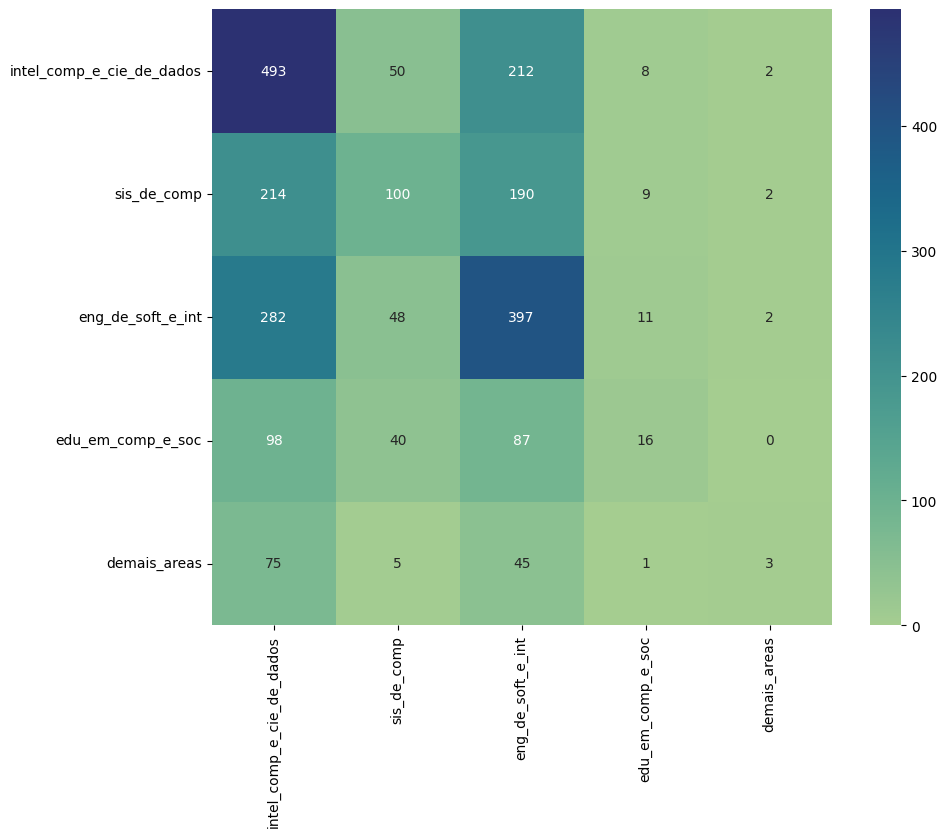

In [85]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)

labels = ['intel_comp_e_cie_de_dados', 'sis_de_comp', 'eng_de_soft_e_int',  'edu_em_comp_e_soc', 'demais_areas']

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, cmap='crest', annot=True, fmt='d',yticklabels=labels, xticklabels=labels)